<a href="https://colab.research.google.com/github/AlidineRemo/Deep-Learning-Projects/blob/main/Compte_Rendu/TP_4_DeepLearning_(CNNs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Objectif du TP**
 L’objectif de ce Travail Pratique est de permettre à l’étudiant de :

 1. Comprendre et appliquer les concepts fondamentaux des Réseaux de Neurones Convolutionnels (CNN) pour traiter des
données visuelles.
 2. Concevoir, entraîner et évaluer un modèle CNN sur une tâche :

   • de classification (ex : homme / femme / enfant),

   • ou de régression (ex : prédiction de l’âge à partir d’une image).

 3. Maîtriser les différentes étapes d’un pipeline Deep Learning :

 ✓ Préparation et chargement du dataset,

 ✓ Pré-traitement et augmentation des images,

 ✓ Construction d’un CNN,

 ✓ Entraînement, validation et test,

 ✓ Analyse et interprétation des performances (accuracy, loss, MAE, MSE…).

 4. Comparer les résultats obtenus avec différentes architectures, hyperparamètres et stratégies d’optimisation.

 5. Comprendre pourquoi les CNN sont adaptés aux problèmes d'analyse d’images.

6. Utiliser des frameworks modernes de Deep Learning pour construire et entraîner les modèles :

   • TensorFlow / Keras : bibliothèque open-source permettant de définir, entraîner et déployer facilement des réseaux de neurones, avec  un pipeline de données optimisé et des outils intégrés pour le calcul sur GPU.

  • PyTorch : alternative populaire à TensorFlow, très flexible et intuitive pour la recherche et le prototypage de modèles.
 ( Dans notre TP on va travailler avec TensorFlow )

 • Pourquoi CNN pour la classification / régression d’images ?
 Les CNN sont utilisés car ils imitent la manière dont le cerveau humain traite les images :

 ✔ Extraction automatique des caractéristiques
 Pas besoin de faire du feature engineering manuel (comme en ML traditionnel).
 Les convolutions apprennent automatiquement :
 bords, textures, motifs,, formes complexes (yeux, visage…).

 ✔ Partage des poids (weight sharing)
 Chaque filtre apprend un motif qui se répète partout dans l’image → modèle plus rapide, moins de paramètres.

 ✔ Invariance aux translations
 Le modèle reconnaît un visage ou un objet même :
 déplacé, zoomé, légèrement déformé, partiellement visible.

 ✔ Adaptés à la structure spatiale des images
 Contrairement aux méthodes classiques (SVM, KNN…), les CNN exploitent :
 la proximité des pixels, les relations locales, la hiérarchie des formes.

 ✔ Performance très élevée sur les tâches vision
 Aujourd’hui, les CNN sont la norme pour :
 classification d’images, détection, segmentation, reconnaissance faciale, prédiction continue (âge, landmarks…).


##Exemple 1 — Classification MNIST (Chiffres manuscrits)

1) Importation + Chargement du dataset

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [ ]:
# Chargement MNIST
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [ ]:
# Normalisation
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Redimensionner (Conv2D attend des images 28×28×1)
x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print("Shape:", x_train.shape, y_train.shape)

Shape: (60000, 28, 28, 1) (60000,)


2) Visualisation

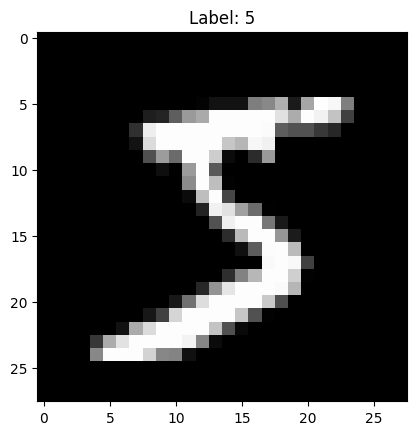

In [ ]:
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()


3) Construction du CNN

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

#• Entrainement
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

4) Entraînement

In [ ]:
history = model.fit(
    x_train, y_train,
    epochs=5,
    validation_split=0.2
)


Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9011 - loss: 0.3229 - val_accuracy: 0.9789 - val_loss: 0.0698
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9850 - loss: 0.0476 - val_accuracy: 0.9867 - val_loss: 0.0505
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9905 - loss: 0.0295 - val_accuracy: 0.9885 - val_loss: 0.0399
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9935 - loss: 0.0218 - val_accuracy: 0.9871 - val_loss: 0.0416
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9952 - loss: 0.0150 - val_accuracy: 0.9895 - val_loss: 0.0358


5) Courbes d’apprentissage

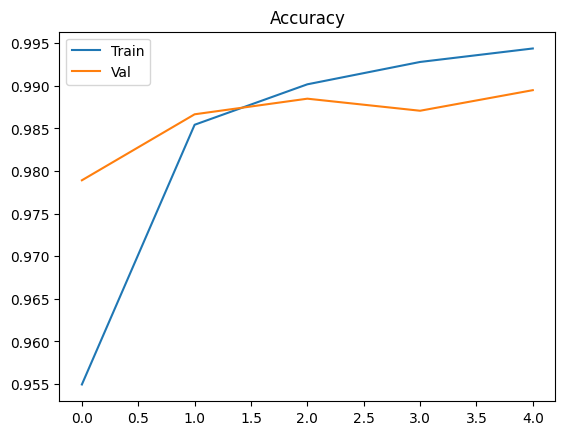

In [ ]:
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Val')
plt.legend()
plt.title("Accuracy")
plt.show()


6) Évaluation

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy Test:", test_acc)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9840 - loss: 0.0465
Accuracy Test: 0.9873999953269958


7) Prédiction

In [ ]:
import numpy as np

img = x_test[0]
pred = model.predict(img[None, ...])
print("Pred:", np.argmax(pred))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
Pred: 7


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step


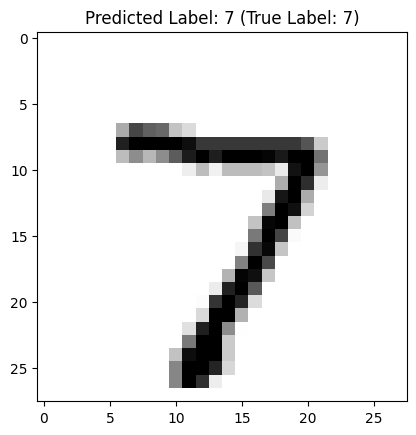

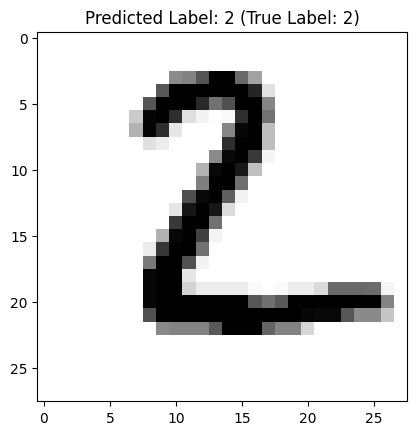

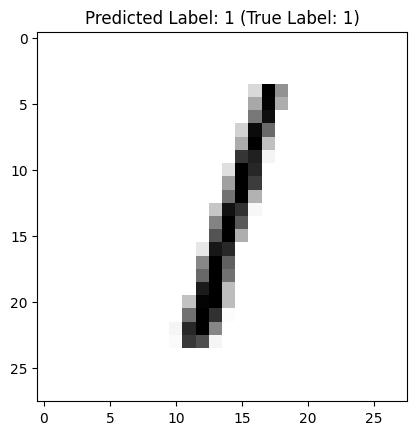

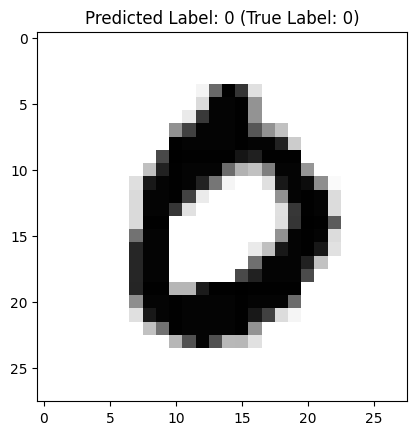

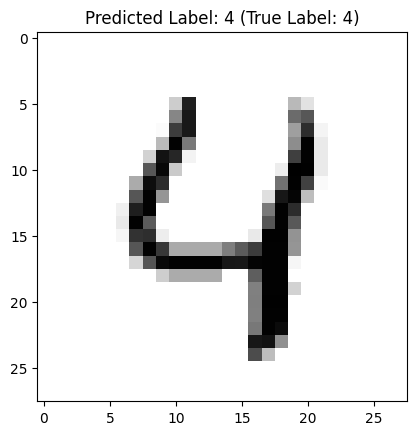

In [ ]:
import matplotlib.pyplot as plt
# Prédiction sur plusieurs images du dataset de test
num_images = 5 # Le nombre d'images à tester
predictions = model.predict(x_test[:num_images])
# Affichage des images et de leurs prédictions
for i in range(num_images):
    plt.imshow(x_test[i].reshape((28, 28)), cmap=plt.cm.binary)
    plt.title(f"Predicted Label: {np.argmax(predictions[i])} (True Label: {y_test[i]})")
    plt.show()

##🌸 Exemple 2 — Classification des Fleurs

1) Chargement du dataset TensorFlow

Importation des lirairies

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.19.0


Chargement du dataset

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
    "tf_flowers",
    split=["train[:80%]", "train[80%:]"], # 80% train, 20% test
    as_supervised=True,
    with_info=True
)
class_names = ds_info.features["label"].names
print("Classes", class_names)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/tf_flowers/incomplete.60WYMQ_3.0.1/tf_flowers-train.tfrecord*...:   0%|   …

Dataset tf_flowers downloaded and prepared to /root/tensorflow_datasets/tf_flowers/3.0.1. Subsequent calls will reuse this data.
Classes ['dandelion', 'daisy', 'tulips', 'sunflowers', 'roses']


• Visualisation des images du Dataset

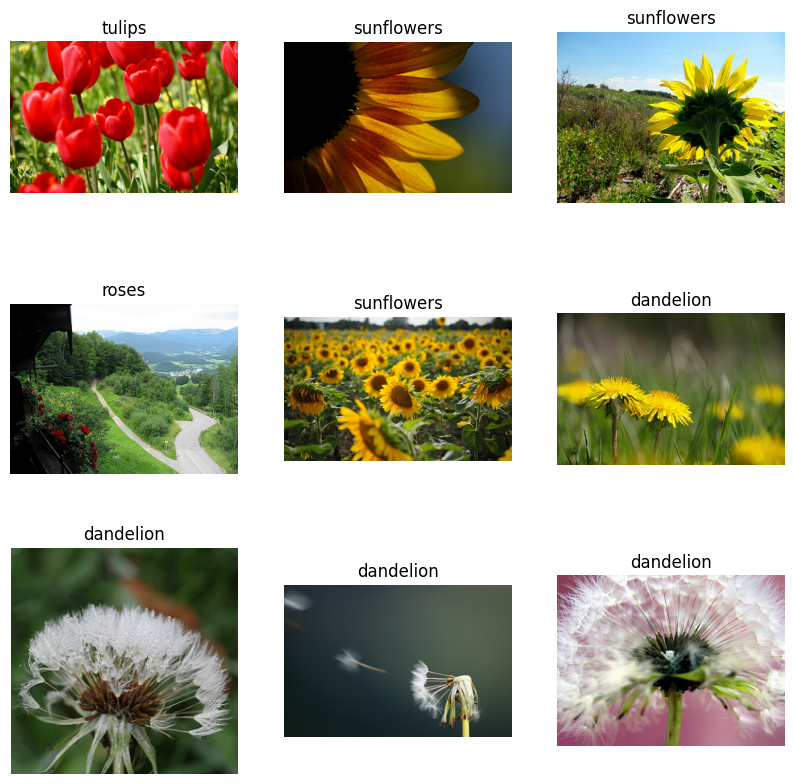

In [ ]:
plt.figure(figsize=(10, 10))
for i, (image, label) in enumerate(ds_train.take(9)):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(image)
    plt.title(class_names[label])
    plt.axis("off")
plt.show()

Prétraitement du Dataset

In [ ]:
IMG_SIZE = 128
def preprocess (image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
])

In [ ]:
BATCH_SIZE = 32
train_ds = ds_train.map(preprocess).shuffle (1000).batch (BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)


## Construction d’un CNN

In [ ]:
model = tf.keras.Sequential ([
data_augmentation,
tf.keras.layers.Conv2D (32, (3,3), activation='relu', padding="same"),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D (64, (3,3), activation='relu', padding="same"),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Conv2D(128, (3,3), activation='relu', padding="same"),
tf.keras.layers.MaxPooling2D(),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense (128, activation='relu'),
tf.keras.layers.Dropout (0.3),
tf.keras.layers.Dense(5, activation='softmax') #5 classes
])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_1 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

• Entrainement

In [ ]:
model.compile(
optimizer="adam",
loss="sparse_categorical_crossentropy",
metrics=["accuracy"]
)
history = model.fit(
train_ds,
validation_data= test_ds,
epochs=15
)

Epoch 1/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 13s 56ms/step - accuracy: 0.2672 - loss: 1.7120 - val_accuracy: 0.4809 - val_loss: 1.1934
Epoch 2/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4993 - loss: 1.2185 - val_accuracy: 0.5204 - val_loss: 1.1349
Epoch 3/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5668 - loss: 1.0996 - val_accuracy: 0.6131 - val_loss: 0.9584
Epoch 4/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.6032 - loss: 0.9985 - val_accuracy: 0.6322 - val_loss: 0.9444
Epoch 5/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6461 - loss: 0.9014 - val_accuracy: 0.6689 - val_loss: 0.8507
Epoch 6/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.6659 - loss: 0.8487 - val_accuracy: 0.6676 - val_loss: 0.8398
Epoch 7/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6951 - loss: 0.8058 - val_accuracy: 0.7030 - val_loss: 0.7852
Epoch 8/15
92/92 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - accuracy: 0.7087 - loss: 0.7702 - val_accuracy: 0.6948 - 

Courbes d’apprentissage

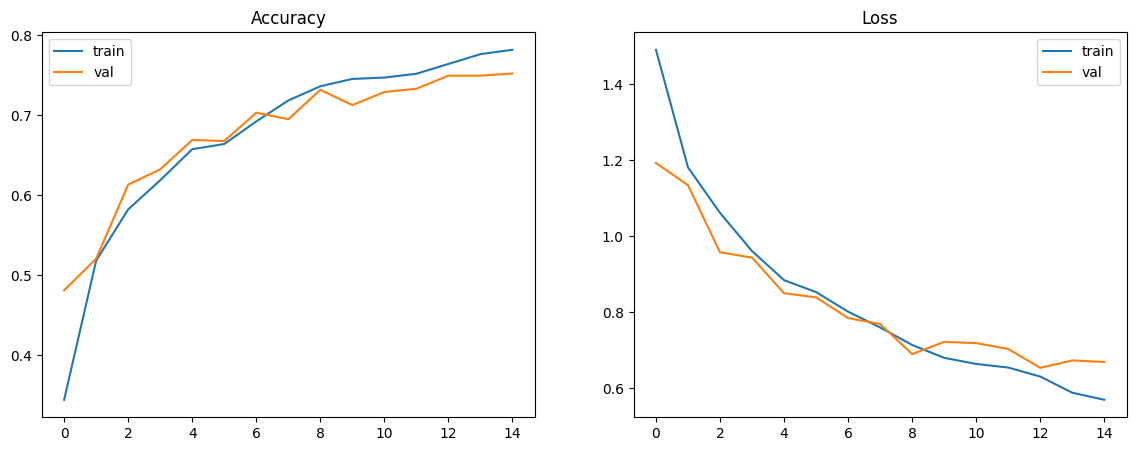

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="val")
plt.title("Accuracy")
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="val")
plt.title("Loss")
plt.legend()
plt.show()

• Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Accuracy test", test_acc)

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7356 - loss: 0.7213
Accuracy test 0.752043604850769


• Affichage de 10 images du test avec classe réelle & prédite

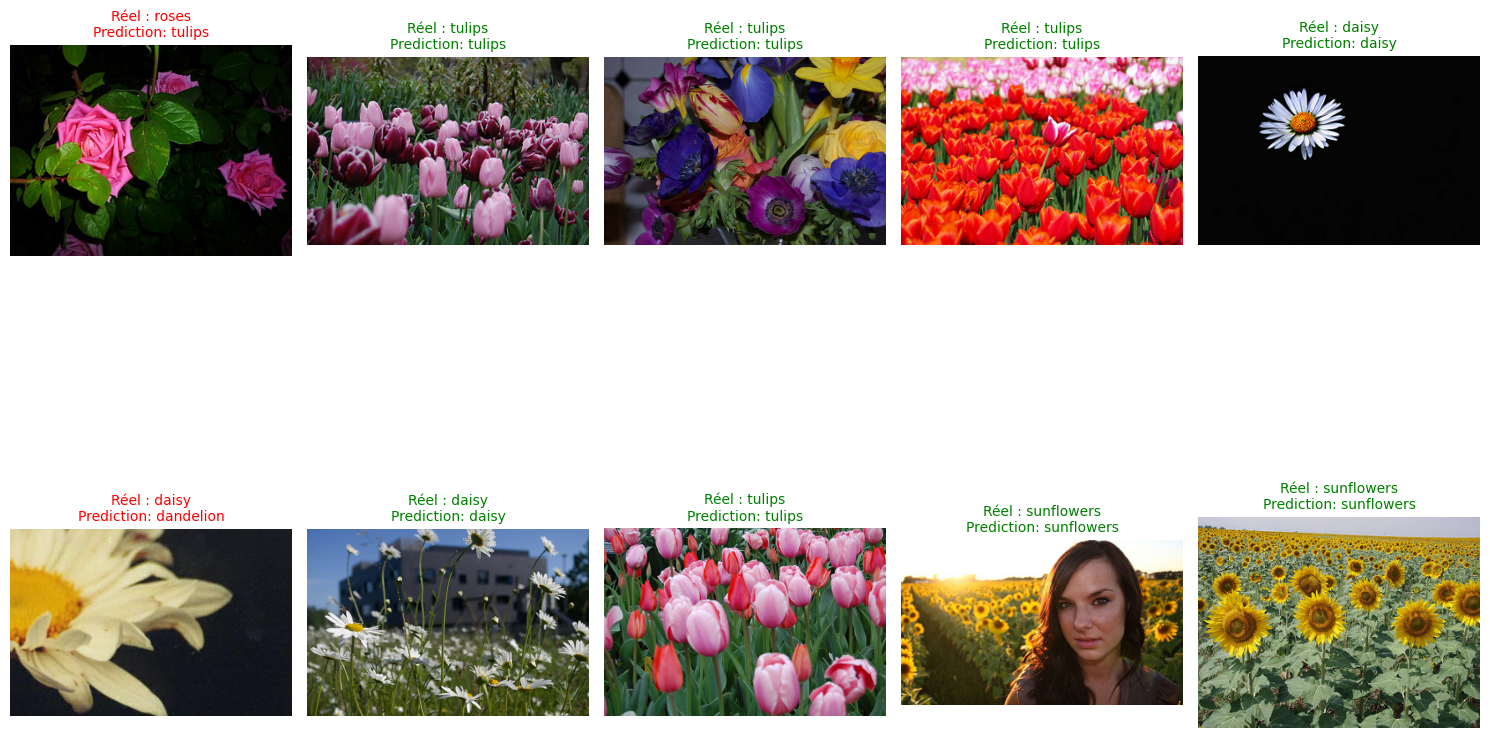

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
#On va prendre 10 images du test set
num_images = 10
plt.figure(figsize=(15, 12))
for i, (image, label) in enumerate(ds_test.take(num_images)):
#prétraitement de l'image pour la prédiction
  img_resized = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0
  prediction = model.predict(tf.expand_dims(img_resized, axis=0), verbose=0)
  pred_label= np.argmax(prediction)

  #Affichage
  plt.subplot(2, 5, i + 1)
  plt.imshow(image)
  plt.axis("off")
  plt.title(
      f"Réel : {class_names[label]}\n"
      f"Prediction: {class_names[pred_label]}",
      color = "green" if pred_label == label else "red",
      fontsize = 10
  )
plt.tight_layout()
plt.show()


• Sauvegarde du modèle

In [ ]:
model.save("cnn_flowers.h5")
print("Modèle sauvegarde !")

Modèle sauvegarde !


##🐶 Exemple 3 — Classification Chat vs Chien (Binary)

1) Chargement du dataset

Importation des librairies + Chargement du Dataset




In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
(ds_train, ds_test), ds_info = tfds.load(
"cats_vs_dogs",
split=["train[:88%]", "train[80%:]"],
as_supervised=True,
with_info=True
)
class_names = ["Cat", "Dog"]
ds_info

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.32QO23_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


tfds.core.DatasetInfo(
    name='cats_vs_dogs',
    full_name='cats_vs_dogs/4.0.1',
    description="""
    A large set of images of cats and dogs. There are 1738 corrupted images that are dropped.
    """,
    homepage='https://www.microsoft.com/en-us/download/details.aspx?id=54765',
    data_dir='/root/tensorflow_datasets/cats_vs_dogs/4.0.1',
    file_format=tfrecord,
    download_size=786.67 MiB,
    dataset_size=1.04 GiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'image/filename': Text(shape=(), dtype=string),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    nondeterministic_order=False,
    splits={
        'train': <SplitInfo num_examples=23262, num_shards=16>,
    },
    citation="""@Inproceedings (Conference){asirra-a-captcha-that-exploits-interest-aligned-manual-image-categorization,
    author = {Elson, Jeremy and Douceur, Jo

• Visualisation des images du Dataset

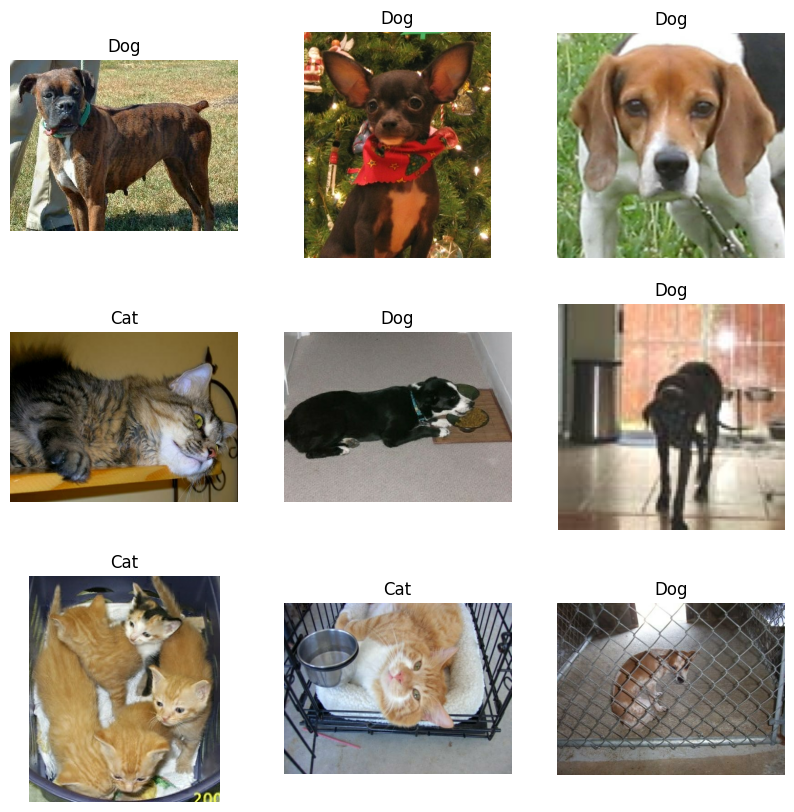

In [ ]:
plt.figure(figsize=(10, 10))
for i, (img, label) in enumerate(ds_train.take(9)):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(class_names [label])
    plt.axis("off")
plt.show()

• Prétraitement des données + Data_Augmentation

In [ ]:
IMG_SIZE = 128
def preprocess(image, label):
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [ ]:
data_augmentation = tf.keras.Sequential ([
tf.keras.layers.RandomFlip("horizontal"),
tf.keras.layers.RandomRotation(0.1),
tf.keras.layers.RandomZoom (0.1)
])

In [ ]:
BATCH_SIZE = 32
train_ds = ds_train.map(preprocess).shuffle(1000).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_ds = ds_test.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

• Construction du modèle

In [ ]:
model = tf.keras. Sequential([
    data_augmentation,
    tf.keras.layers.Conv2D (32, (3,3), activation= 'relu', padding='same'),
    tf.keras.layers. MaxPooling2D(),
    tf.keras.layers.Conv2D (64, (3,3), activation ='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, (3,3), activation ='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers. Dense (128, activation ='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers. Dense (1, activation='sigmoid') #Binaire
])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

• Entrainement

In [ ]:
model.compile(
    optimizer ="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)
history= model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=10
)

Epoch 1/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.5585 - loss: 0.6946 - val_accuracy: 0.6933 - val_loss: 0.5792
Epoch 2/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 35s 52ms/step - accuracy: 0.6890 - loss: 0.5921 - val_accuracy: 0.7620 - val_loss: 0.5160
Epoch 3/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 37s 55ms/step - accuracy: 0.7438 - loss: 0.5228 - val_accuracy: 0.7831 - val_loss: 0.4699
Epoch 4/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 43s 66ms/step - accuracy: 0.7651 - loss: 0.4886 - val_accuracy: 0.8123 - val_loss: 0.4166
Epoch 5/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 35s 53ms/step - accuracy: 0.7897 - loss: 0.4544 - val_accuracy: 0.8255 - val_loss: 0.3864
Epoch 6/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 36s 54ms/step - accuracy: 0.8025 - loss: 0.4315 - val_accuracy: 0.8349 - val_loss: 0.3618
Epoch 7/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 34s 50ms/step - accuracy: 0.8108 - loss: 0.4173 - val_accuracy: 0.8224 - val_loss: 0.3932
Epoch 8/10
640/640 ━━━━━━━━━━━━━━━━━━━━ 39s 49ms/step - accuracy: 0.8276 - loss: 0.3917 - 

.  Courbes d’apprentissage

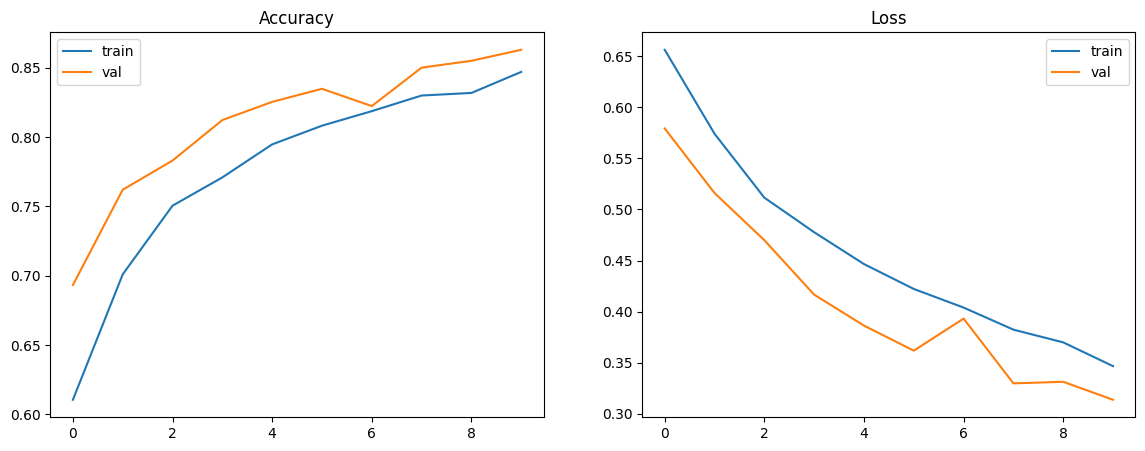

In [ ]:
plt.figure(figsize = (14,5))

#ACCURACY
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], label-"train")
plt.plot(history.history["val_accuracy"], label="val")
plt.title("Accuracy")
plt.legend()

#LOSS
plt.subplot(1,2,2)
plt.plot(history.history["loss"], label-"train")
plt.plot(history.history["val_loss"], label="val")
plt.title("Loss")
plt.legend()
plt.show()

• Evaluation

In [ ]:
test_loss, test_acc = model.evaluate(test_ds)
print("Test accuracy", test_acc)

• Evaluation

In [ ]:
plt.figure(figsize=(15, 12))
num_images = 10
for i, (image, label) in enumerate(ds_test.take(num_images)):
img_resized =tf.image.resize(image, (IMG_SIZE, IMG_SIZE)) / 255.0 pred model.predict(tf.expand_dims(img_resized, e), verbose-0)
pred_label = 1 if pred >0.5 else 0
plt.subplot(2, 5, 1+1)
plt.imshow(image)
color "green" if pred_label label else "red"
plt.title(f"Réel (class_names[label]]\nPrédit (class_names [pred_label]}", color-color)
plt.axis("off")
plt.tight_layout()
plt.show()